In [99]:
# 我们着重讨论不同区域的显著性影响因素
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv("C:/Users/86187/Desktop/新加坡国立大学暑期学校相关文件/data_cleaned.csv")
data.describe()

Lng            Lat           Cid            DOM  \
count  297597.000000  297597.000000  2.975970e+05  152184.000000   
mean      116.418767      39.949761  1.126275e+12      29.469701   
std         0.110999       0.091533  1.331619e+12      50.394467   
min       116.072514      39.627030  1.111030e+12       1.000000   
25%       116.345863      39.893200  1.111030e+12       1.000000   
50%       116.416780      39.934530  1.111030e+12       7.000000   
75%       116.476921      40.003156  1.111030e+12      38.000000   
max       116.711337      40.252758  1.184870e+14    1677.000000   

           followers          price     livingRoom    drawingRoom  \
count  297597.000000  297597.000000  297597.000000  297597.000000   
mean        0.015039       0.391045       2.011102       1.171107   
std         0.030417       0.178332       0.764922       0.512581   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.258747       1.000000       1.000000   
50%         0.004374       0.357607       2.000000       1.000000   
75%         0.016623       0.485556       2.000000       1.000000   
max         1.000000       1.000000       8.000000       5.000000   

             kitchen       bathRoom  ...  buildingStructure    ladderRatio  \
count  297597.000000  297597.000000  ...      297597.000000  297597.000000   
mean        0.995131       1.182351  ...           4.421473       0.381856   
std         0.100335       0.423099  ...           1.907456       0.176411   
min         0.000000       0.000000  ...           1.000000       0.014000   
25%         1.000000       1.000000  ...           2.000000       0.250000   
50%         1.000000       1.000000  ...           6.000000       0.333000   
75%         1.000000       1.000000  ...           6.000000       0.500000   
max         3.000000       7.000000  ...           6.000000       5.000000   

            elevator         subway       district  communityAverage  \
count  297597.000000  297597.000000  297597.000000     297597.000000   
mean        0.570624       0.602388       6.748516      63696.710585   
std         0.494988       0.489405       2.811945      22153.499402   
min         0.000000       0.000000       1.000000      10847.000000   
25%         0.000000       0.000000       6.000000      46505.000000   
50%         1.000000       1.000000       7.000000      59025.000000   
75%         1.000000       1.000000       8.000000      75858.000000   
max         1.000000       1.000000      13.000000     183109.000000   

       tradeTimeModefiy  Original_price  Original_followers  attractiveness  
count     297597.000000   297597.000000       297597.000000   297597.000000  
mean      735621.421896    42715.008611           17.189713        0.391045  
std          597.390522    19476.512214           34.766471        0.178332  
min       734046.000000        7.000000            0.000000        0.000000  
25%       735124.000000    28266.000000            0.000000        0.258747  
50%       735769.000000    39063.000000            5.000000        0.357607  
75%       736091.000000    53037.000000           19.000000        0.485556  
max       736628.000000   109222.000000         1143.000000        1.000000  

[8 rows x 24 columns]

In [101]:
data.shape

(297597, 25)

In [102]:
data['totalRoom'] = data['livingRoom'] + data['drawingRoom'] + data['kitchen'] + data['bathRoom']
data['houseAge'] = data['tradeTimeModefiy']//365 - data['constructionTime']
data['houseCondition'] = data['renovationCondition'] + data['subway'] + data['elevator'] 

In [103]:
import folium
# 创建地图对象，设置初始位置和缩放级别
m = folium.Map(location=[39.906217, 116.3912757], zoom_start=13)
# 在地图上添加一个标记点
folium.Marker([39.906217, 116.3912757], popup='Beijing').add_to(m)
display(m)

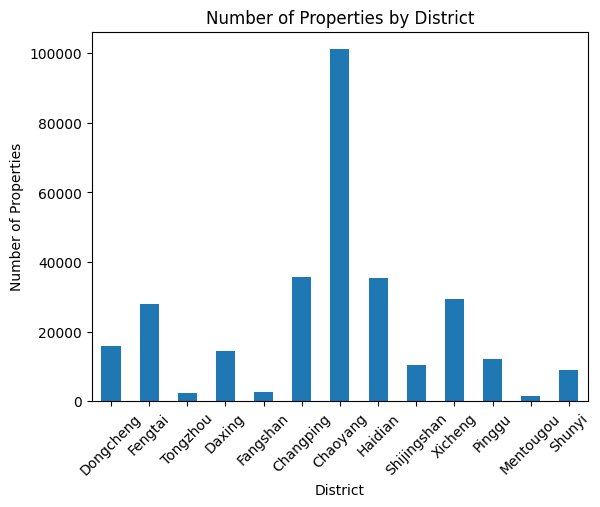

In [104]:
# 对district进行分组并计算每个区域的样本个数
district_counts = data.groupby('district').size()
# 绘制柱状图
district_counts.plot(kind='bar')

plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by District')
plt.xticks(range(len(district_counts)), ['Dongcheng', 'Fengtai', 'Tongzhou', 'Daxing', 'Fangshan', 'Changping', 'Chaoyang', 'Haidian', 'Shijingshan', 'Xicheng', 'Pinggu', 'Mentougou', 'Shunyi'], rotation=45)
plt.show()

In [105]:
# 我们分区块研究影响房价的显著因素
# 东城区
from folium.plugins import MarkerCluster
Pinggu_data = data[data['district'] == 11]
map_center = [Pinggu_data.iloc[0]['Lat'], Pinggu_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 创建一个 MarkerCluster 对象
marker_cluster = MarkerCluster().add_to(m)
# 遍历为每个点添加标记到 MarkerCluster 中，而不是直接添加到地图上
for index, row in Pinggu_data.iterrows():
    folium.Marker([row['Lat'], row['Lng']]).add_to(marker_cluster)
display(m)

In [106]:
from folium.plugins import HeatMap
# 东城区
# 我们先观察房屋价格在地理空间中的分布情况
map_center = [Pinggu_data.iloc[0]['Lat']-0.03, Pinggu_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 权重设置为每个点的price
heat_data = [[row['Lat'], row['Lng'], row['attractiveness']] for index, row in Pinggu_data.iterrows()]
# 创建热度图并添加到地图上，使用price作为权重
HeatMap(heat_data,blur=4, radius=8).add_to(m)
m

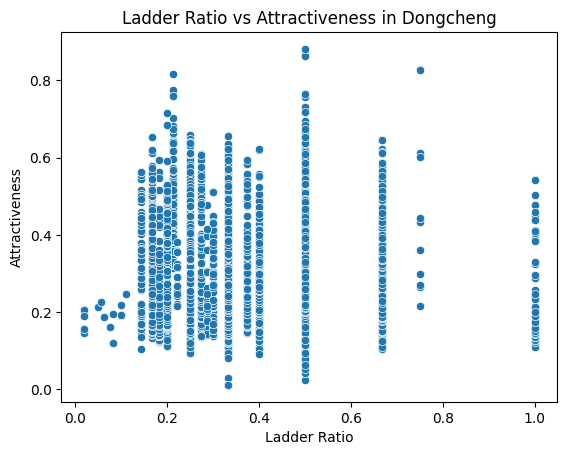

In [107]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
import seaborn as sns
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Pinggu_data, x='ladderRatio', y='attractiveness')
plt.title('Ladder Ratio vs Attractiveness in Dongcheng')
plt.xlabel('Ladder Ratio')
plt.ylabel('Attractiveness')
plt.show()

In [108]:
# 计算ladderRatio和attractiveness之间的相关系数
correlation_matrix = Pinggu_data[['ladderRatio', 'attractiveness']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 从相关系数的角度看一般条件下ladderRatio在东城区不是一个显著影响房屋吸引力的因素

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.149192
attractiveness    -0.149192        1.000000


In [109]:
# 我们再观察东城区的房价与楼层高度的关系
high_floor = Pinggu_data[Pinggu_data['floor'] > 10]
low_floor = Pinggu_data[Pinggu_data['floor'] <= 10]
print("东城区高层建筑共{high_floor}个，低层建筑共{low_floor}个,高层建筑占比为{high_floor_ratio:.2f}%".format(high_floor=len(high_floor), low_floor=len(low_floor), high_floor_ratio=len(high_floor)/len(Pinggu_data)*100))

东城区高层建筑共5593个，低层建筑共6524个,高层建筑占比为46.16%


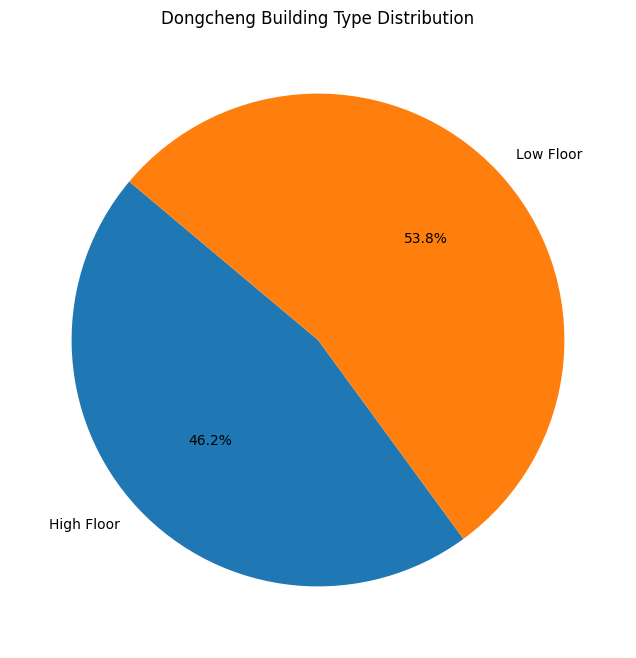

In [110]:
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie([len(high_floor), len(low_floor)], labels=['High Floor', 'Low Floor'], autopct='%1.1f%%', startangle=140)
plt.title('Dongcheng Building Type Distribution')
plt.show()

In [111]:
# 计算floor和attractivness之间的相关系数
correlation_matrix = Pinggu_data[['floor', 'attractiveness']].corr()
print(correlation_matrix)

                   floor  attractiveness
floor           1.000000        0.183277
attractiveness  0.183277        1.000000


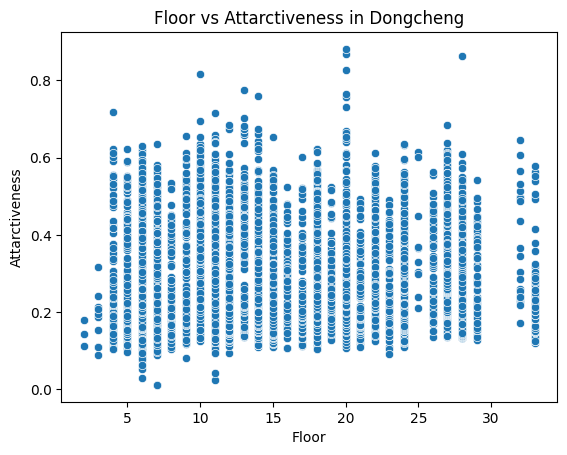

In [112]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Pinggu_data, x='floor', y='attractiveness')
plt.title('Floor vs Attarctiveness in Dongcheng')
plt.xlabel('Floor')
plt.ylabel('Attarctiveness')
plt.show()

In [113]:
# 发现在东城区中整体上floor和房屋的受欢迎程度没有关联
# 计算在高层条件下ladderRatio和attractiveness之间的相关系数
correlation_matrix = high_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.114713
attractiveness    -0.114713        1.000000


In [114]:
correlation_matrix = low_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)
# 对于低层建筑, ladderRatio和attractiveness之间的关联性相较于高层建筑要更弱,虽然面对高层建筑时人们会考虑人均楼梯数目但总体来说不显著

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.133366
attractiveness    -0.133366        1.000000


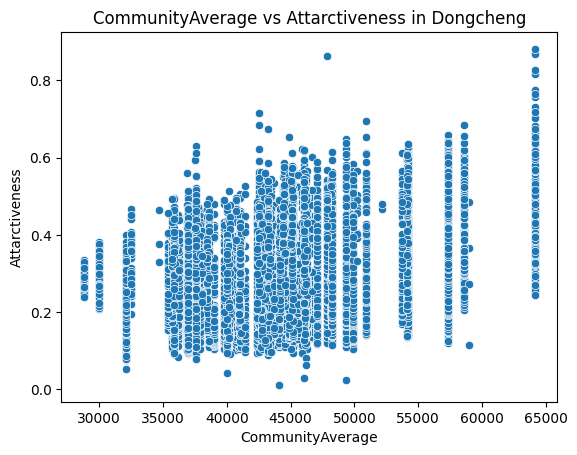

In [115]:
sns.scatterplot(data=Pinggu_data, x='communityAverage', y='attractiveness')
plt.title('CommunityAverage vs Attarctiveness in Dongcheng')
plt.xlabel('CommunityAverage')
plt.ylabel('Attarctiveness')
plt.show()

In [116]:
# 研究communityAverage与attractiveness之间的关联度
correlation_matrix = Pinggu_data[['communityAverage', 'attractiveness']].corr()
print(correlation_matrix)

                  communityAverage  attractiveness
communityAverage          1.000000        0.275655
attractiveness            0.275655        1.000000


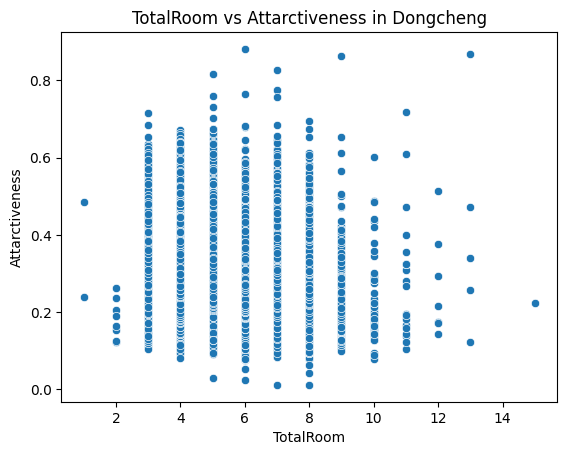

In [117]:
sns.scatterplot(data=Pinggu_data, x='totalRoom', y='attractiveness')
plt.title('TotalRoom vs Attarctiveness in Dongcheng')
plt.xlabel('TotalRoom')
plt.ylabel('Attarctiveness')
plt.show()

In [118]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Pinggu_data[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000       -0.135238
attractiveness  -0.135238        1.000000


In [119]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Pinggu_data[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000       -0.135238
attractiveness  -0.135238        1.000000


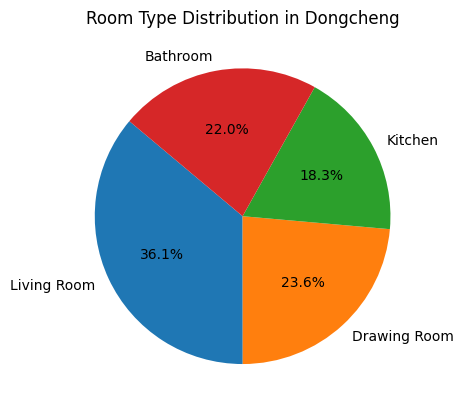

In [120]:
# 分别计算每种房间的总数
total_livingRoom = Pinggu_data['livingRoom'].sum()
total_drawingRoom = Pinggu_data['drawingRoom'].sum()
total_kitchen = Pinggu_data['kitchen'].sum()
total_bathroom = Pinggu_data['bathRoom'].sum()
# 将计算结果合并为一个新的Series
room_totals = pd.Series({
    'Living Room': total_livingRoom,
    'Drawing Room': total_drawingRoom,
    'Kitchen': total_kitchen,
    'Bathroom': total_bathroom
})
room_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution in Dongcheng')
plt.ylabel('')
plt.show()

In [121]:
# 我们从一般的角度出发研究房间类型对吸引力的影响
correlation_matrix = Pinggu_data[['bathRoom','kitchen','drawingRoom','livingRoom' ,'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  livingRoom  attractiveness
bathRoom        1.000000  0.073943     0.458310    0.561281       -0.041799
kitchen         0.073943  1.000000     0.071139    0.097103       -0.007082
drawingRoom     0.458310  0.071139     1.000000    0.542941       -0.154403
livingRoom      0.561281  0.097103     0.542941    1.000000       -0.119855
attractiveness -0.041799 -0.007082    -0.154403   -0.119855        1.000000


In [122]:
big_family = Pinggu_data[Pinggu_data['livingRoom'] >= 3]
# 我们再进一步研究大的家庭对不同种类房间的需求
correlation_matrix = big_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.037102     0.509078        0.037791
kitchen         0.037102  1.000000     0.052896       -0.008433
drawingRoom     0.509078  0.052896     1.000000       -0.003369
attractiveness  0.037791 -0.008433    -0.003369        1.000000


In [123]:
small_family = Pinggu_data[Pinggu_data['livingRoom'] < 3]
correlation_matrix = small_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.058534     0.261314       -0.020897
kitchen         0.058534  1.000000     0.053755        0.000416
drawingRoom     0.261314  0.053755     1.000000       -0.171348
attractiveness -0.020897  0.000416    -0.171348        1.000000


In [124]:
# 交易时房龄对吸引力的影响
correlation_matrix = Pinggu_data[['constructionTime','houseAge','attractiveness']].corr()
print(correlation_matrix)

                  constructionTime  houseAge  attractiveness
constructionTime          1.000000 -0.945704        0.216468
houseAge                 -0.945704  1.000000        0.042310
attractiveness            0.216468  0.042310        1.000000


In [125]:
correlation_matrix = Pinggu_data[['houseCondition','houseAge','constructionTime','attractiveness']].corr()
print(correlation_matrix)

                  houseCondition  houseAge  constructionTime  attractiveness
houseCondition          1.000000 -0.100928          0.309596        0.474920
houseAge               -0.100928  1.000000         -0.945704        0.042310
constructionTime        0.309596 -0.945704          1.000000        0.216468
attractiveness          0.474920  0.042310          0.216468        1.000000


In [126]:
correlation_matrix = high_floor[['elevator','attractiveness']].corr()
print(correlation_matrix)

                elevator  attractiveness
elevator        1.000000       -0.051388
attractiveness -0.051388        1.000000


C:\Users\86187\AppData\Local\Temp\ipykernel_16176\714918940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pinggu_data['buildingType'] = Pinggu_data['buildingType'].map(type_mapping)


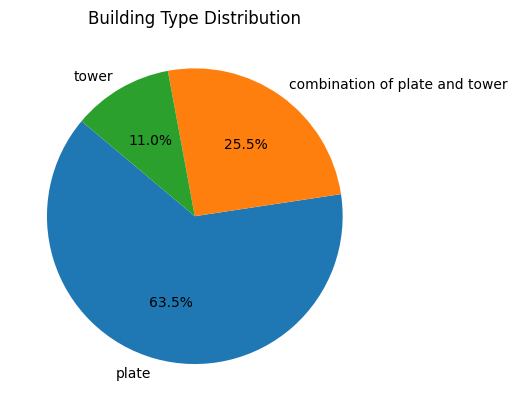

In [127]:
type_mapping = {
    1: 'tower',
    2: 'bungalow',
    3: 'combination of plate and tower',
    4: 'plate'
}
Pinggu_data['buildingType'] = Pinggu_data['buildingType'].map(type_mapping)
building_type_counts = Pinggu_data['buildingType'].value_counts()
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Building Type Distribution')
plt.ylabel('')
plt.show()

buildingType
tower                             0.320966
combination of plate and tower    0.273353
plate                             0.237850
Name: attractiveness, dtype: float64


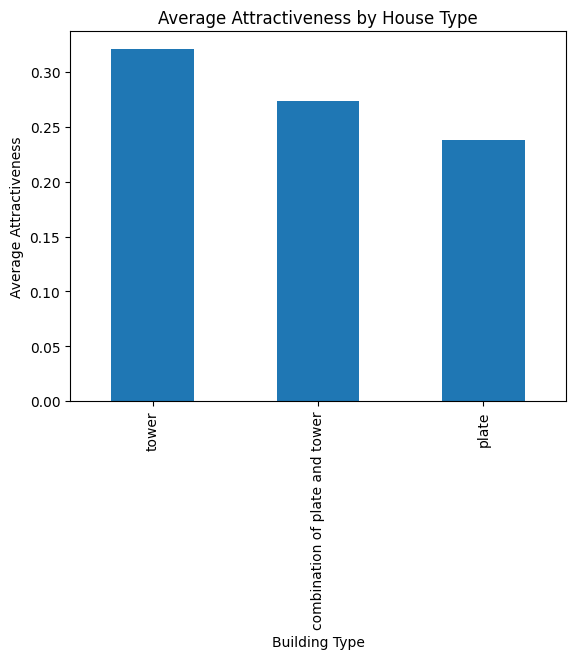

In [128]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Pinggu_data.groupby('buildingType')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by House Type')
plt.xlabel('Building Type')
plt.ylabel('Average Attractiveness')
plt.show()

In [129]:
Pinggu_data= Pinggu_data[Pinggu_data['buildingStructure']!=1]
Pinggu_data['buildingStructure']

154       6
253       6
391       6
441       6
501       2
         ..
297569    6
297571    6
297577    6
297579    6
297587    6
Name: buildingStructure, Length: 12117, dtype: int64

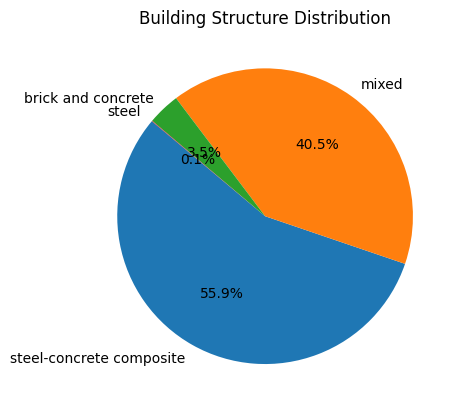

In [130]:
type_mapping = {
    2:"mixed",
    3:"brick and wood", 
    4:"brick and concrete", 
    5:"steel", 
    6:"steel-concrete composite"
}
Pinggu_data['buildingStructure'] = Pinggu_data['buildingStructure'].map(type_mapping)
building_type_counts = Pinggu_data['buildingStructure'].value_counts()
explode_values = (0, 0, 0.3, 0.2, 0.1)
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Building Structure Distribution')
plt.ylabel('')
plt.show()

buildingStructure
steel-concrete composite    0.274168
mixed                       0.233684
steel                       0.227084
brick and concrete          0.225924
Name: attractiveness, dtype: float64


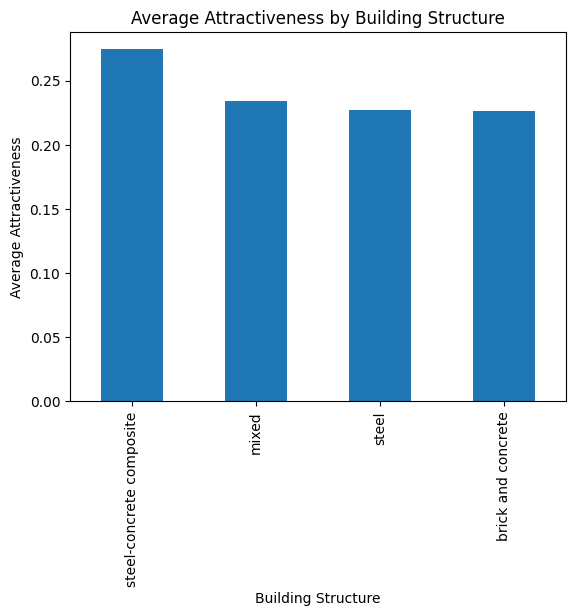

In [131]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Pinggu_data.groupby('buildingStructure')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by Building Structure')
plt.xlabel('Building Structure')
plt.ylabel('Average Attractiveness')
plt.show()